# Title

There's a few more things I need to check, so here's the complete file: <br>
https://nbviewer.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

# MATLAB-like API

The easiest way to use matplot is using it as a MATLAB-like API, designed to be compatible with MATLAB's plotting functions.

Let's create a set of points as $x$ and a dependent variable $y$.

In [2]:
#Linspace creates a set of equally spaced points. In this case, creates 10 points equally spaced from 0 up to 5.
x = np.linspace(0,5,10)
y = x**2

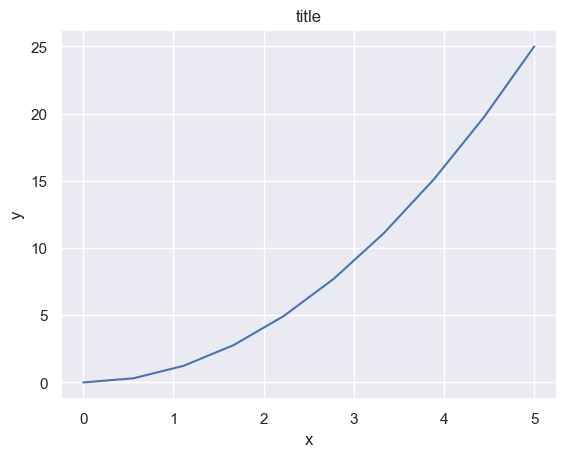

In [3]:
plt.figure()
plt.plot(x, y, 'b') #The 'b' string indicates to plot in "blue" color.
plt.xlabel('x')
plt.ylabel('y')
plt.title('title')
plt.show()

Most of the plotting is cover by the library. Foe example: subplot, colors and symbols.

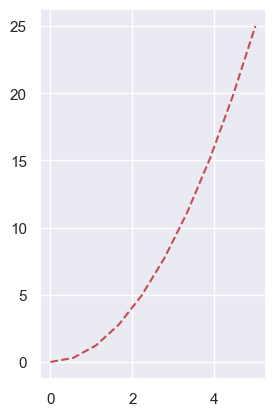

In [4]:
plt.subplot(1,2,1)
plt.plot(x, y, 'r--')

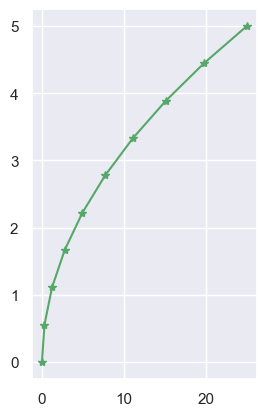

In [5]:
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-')

# Matplotlib Object-oriented API

The main advantage of using OOP it to have objects that one can apply functions and actions to. <br>
In the previous example we created a global figure instance. This time we'll create a variable *fig*, and from it we create new axes.

Text(0.5, 1.0, 'title')

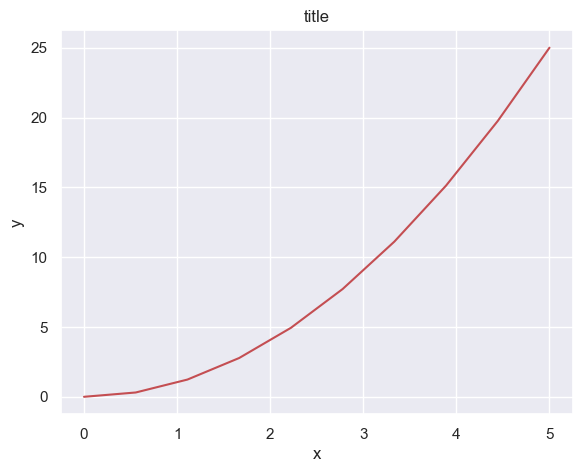

In [6]:
fig = plt.figure() #new figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) #left, bottom, width, height (range 0 to 1)
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

Although a little more code is involved, we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure.

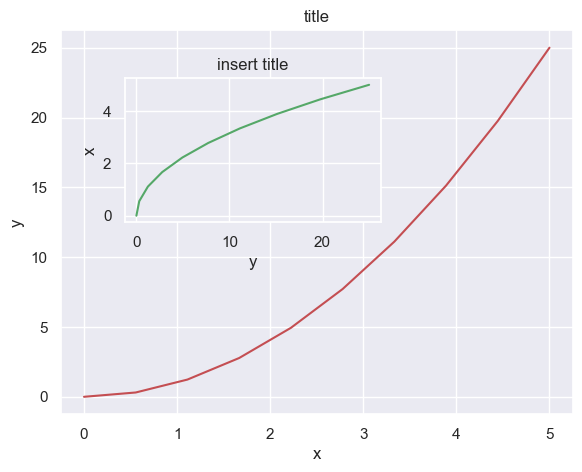

In [7]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');

## Subplots

If you don't care for the position of the axes of several figures, you can use one of the layout managers in matplotlib. One of them is **subplots**.

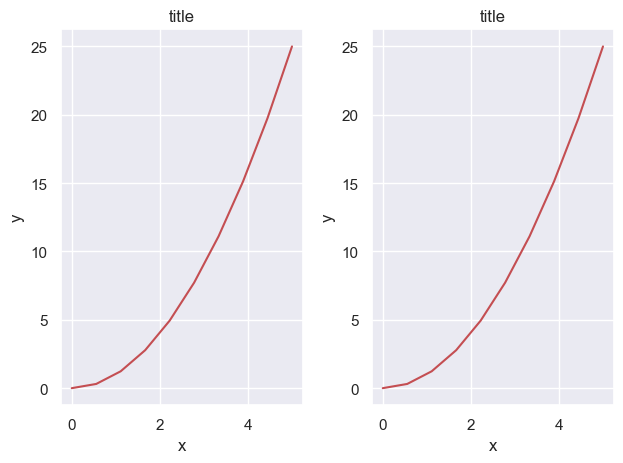

In [8]:
fig, axes = plt.subplots(nrows = 1, ncols=2) #Create a figure and a set of subplots.By default 1 row, 1 column.
for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
    fig.tight_layout() #adjusts the positions of axes on the figure canvas so that there are is overlapping content.

## Figure size, aspect ratio and DPI

Matplotlib allows to specify a few things about the the figure: <br>
- figsize - tuple of the width and height of the figure in inches. <br>
- dpi - dots-per-inch (pixel per inch). <br> <br>

The same arguments can be passed to layout managers like *subplots*.

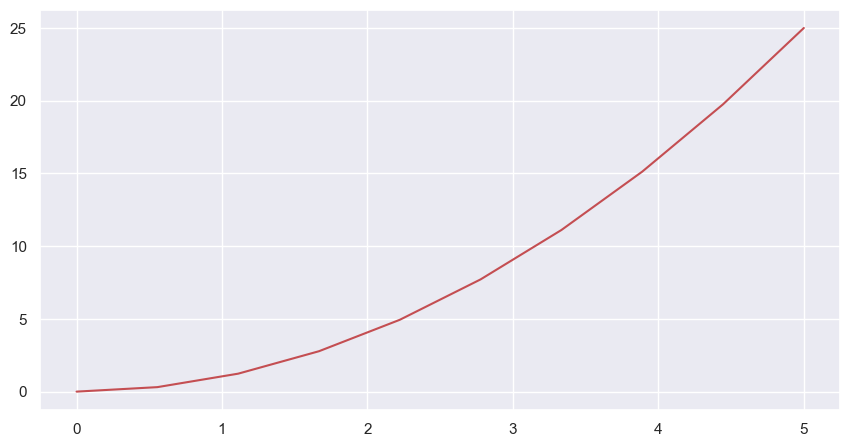

In [9]:
#to create an 800x400 pixel, 100 dots-per-inch figure:
fig = plt.figure(figsize = (8, 4), dpi = 100)
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(x, y, 'r')

## Saving figures

Just use the **savefig** method in the figure class. <br>
You can specify the DPI and choose between different output formats: PNG, JPG, EPS, SVG, PGF and PDF.

In [10]:
fig.savefig("fig_example.png")

## Legends, labels and titles

As we've seen in the prev examples, you can set labels and titles in the following way.

Text(0, 0.5, 'y')

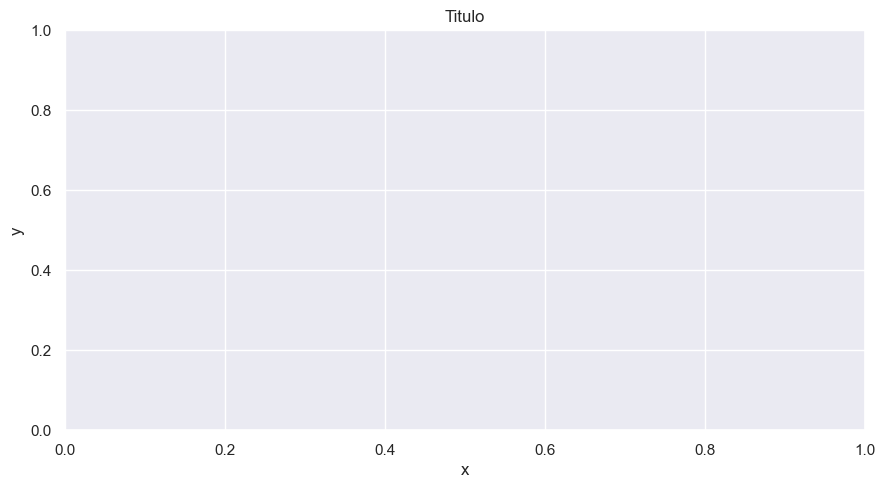

In [11]:
fig = plt.figure(figsize = (8, 4), dpi = 100)
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Titulo")
ax.set_xlabel('x')
ax.set_ylabel('y')

Legends for curves can be added in two ways.

In [12]:
ax.legend(['curve1', 'curve2', 'curve3'])

But usually, a better method (in terms of control) is to use the *label* argument when plots or other objetcs are edded to the figure.

In [13]:
ax.plot(x, x**2, label = 'curve 1')
ax.plot(x, x**3, label = 'curve 2')
ax.legend() #Executes the labels written above.

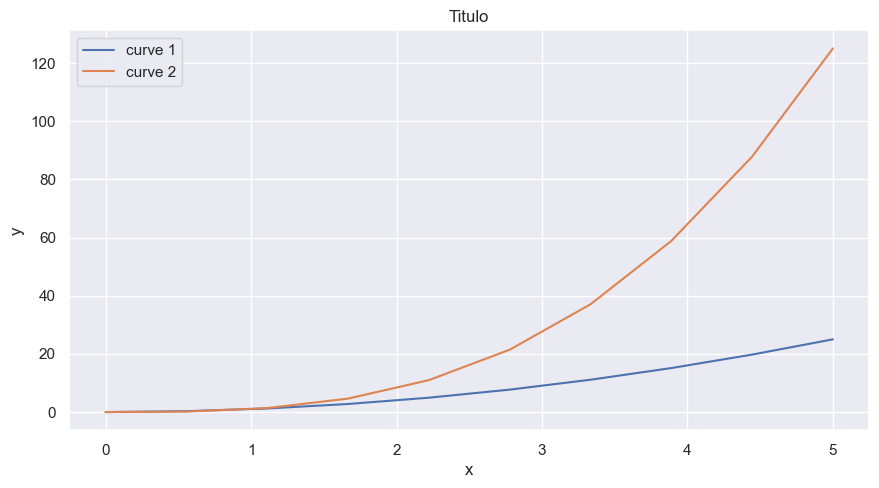

In [14]:
fig

The *legend* function takes an optional keyword argument **loc**, used to specify where in the figure the legend will be drawn. <br>
- ax.legend(loc = 0) #Matloptlib decides the optimal location.<br>
- ax.legend(loc = 1) #Upper right corner.<br>
- ax.legend(loc = 2) #Upper left corner.<br>
- ax.legend(loc = 3) #Lower left corner.<br>
- ax.legend(loc = 4) #Lower right corner.

Annotating text within figures can be done by using the **text** function. <br>
The first two values represent the *x* and *y* coordinates within the plane in which the text will be placed.

Text(3, 15, 'y=x^3')

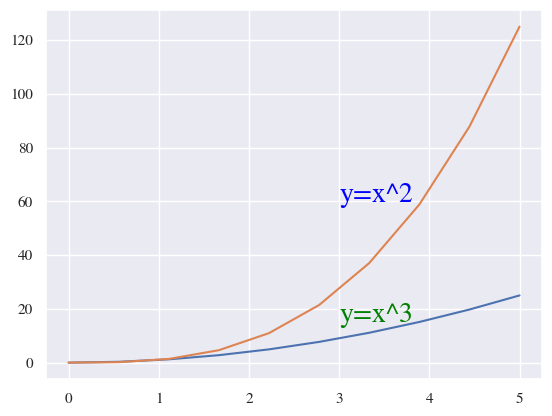

In [43]:
fix, ax = plt.subplots()
ax.plot(x, x*x, x, x*x*x)
ax.text(3, 60, "y=x^2", fontsize=20, color="blue")
ax.text(3, 15, "y=x^3", fontsize=20, color="green")

## $\LaTeX$, fontsize, font family

Pretty much like in Markdown style, to use $\LaTeX$ in text, legends, title, labels, etc; just place $ signs inside the string. <br>
Notice the **r** just before the strings. Raw text strings are prepended with it. Why? Because the backslash has a meaning in Python strings (the escape code character), this way we let it know we are not using it like this.

Text(0.5, 1.0, 'Titulo')

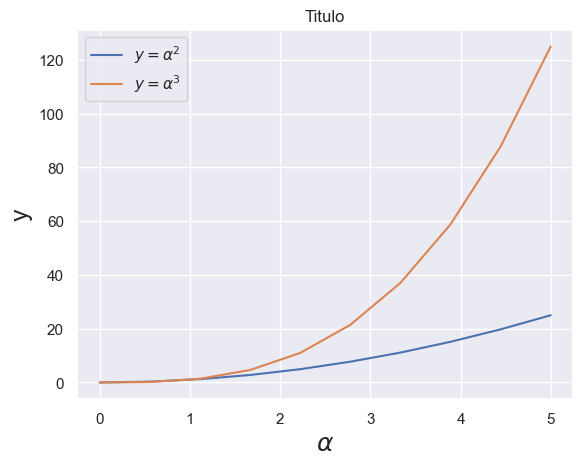

In [15]:
fig, ax = plt.subplots()
ax.plot(x, x**2, label = r"$y = \alpha^{2}$")
ax.plot(x, x**3, label = r"$y = \alpha^{3}$")
ax.legend(loc = 2) #Upper left corner
ax.set_xlabel(r"$\alpha$", fontsize = 18)
ax.set_ylabel(r"y", fontsize = 18)
ax.set_title('Titulo')

You can also change the global font size and font family.

In [16]:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

Another alternative is to request that Matplotlib uses $\LaTeX$ to render text elements in the figure. <br>
matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})

## Setting colors, linewidths, linetypes

Color and line styles can be defined within the **plot()** function.

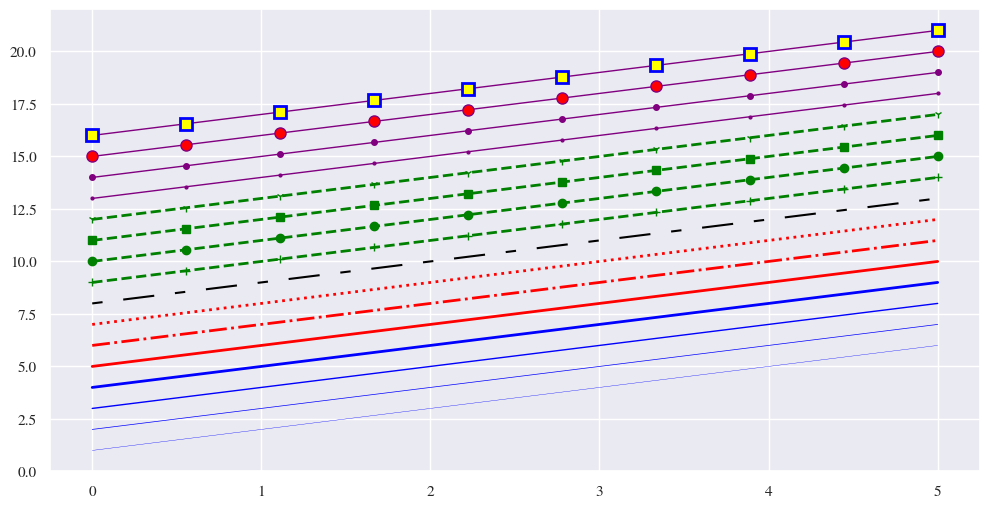

In [17]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

## Control over axis appearance

Sometimes we need to be able to control where the ticks and labels are placed, the labels on the axes and more. 

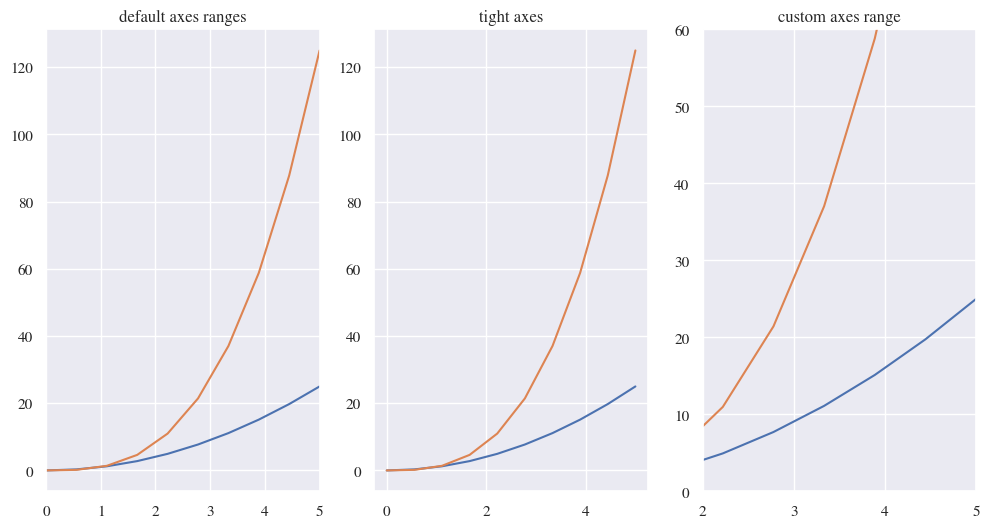

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")
axes[0].set_xlim([0, 5])

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight') #Automatically gets the axe's ranges "tightly fitted"
axes[1].set_title("tight axes") 


axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

Another thing you can do is to adjust the scale. For example, for logarithmic scale:

Text(0.5, 1.0, 'Logarithmic scale (y)')

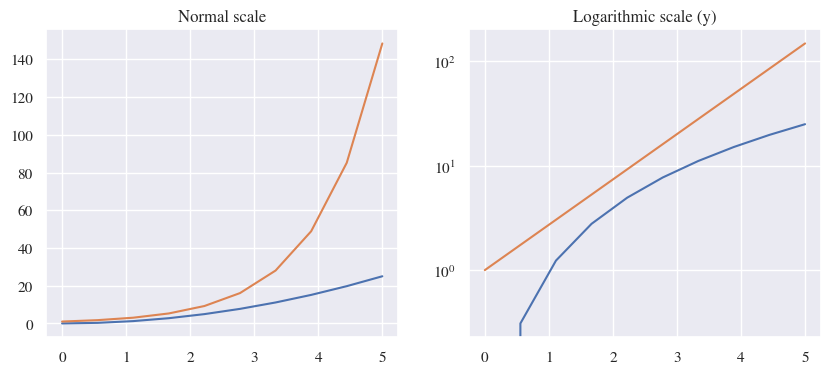

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)")

We can explicitly determine where we want to place axis ticks and if we want to custom text labels for them.

[Text(0, 0, '$0.0$'),
 Text(0, 50, '$50.0$'),
 Text(0, 100, '$100.0$'),
 Text(0, 150, '$150.0$')]

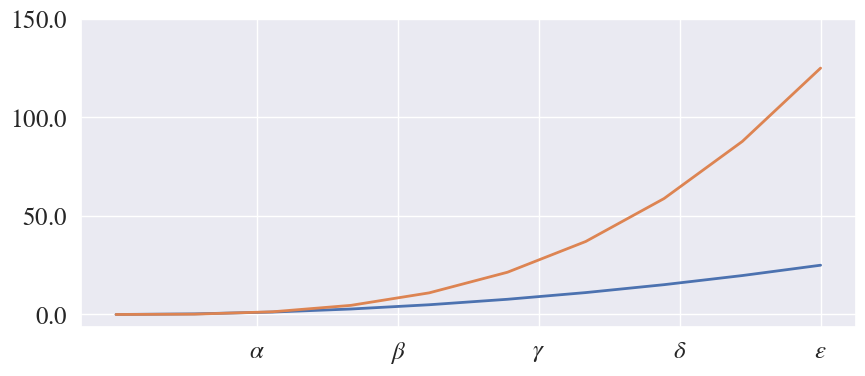

In [20]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5]) #place ticks at...
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18) #Label them as...

yticks = [0, 50, 100, 150] 
ax.set_yticks(yticks) #place ticks at...
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18) # use LaTeX formatted labels

Another interesting option is to format and adjust the grid. We can also customize the appearance of the grid lines using the same keyword arguments as the plot function.

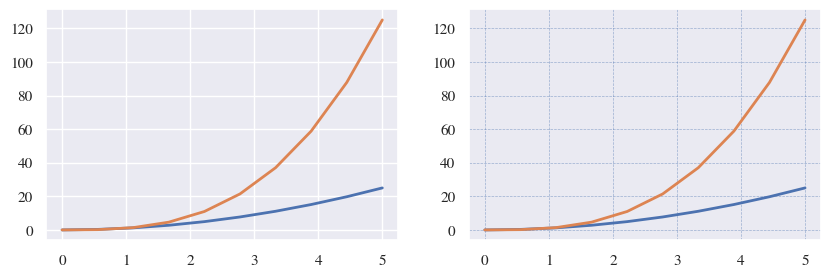

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

Sometimes it is useful to have dual $x$ or $y$ axis, for example, when plotting curves with different units together. <br>
This can be done with the **twinx** and **twiny** functions:
- twinx creates a twin axis sharing the x-axis. <br>
- twiny creates a twin axis sharing the y-axis.

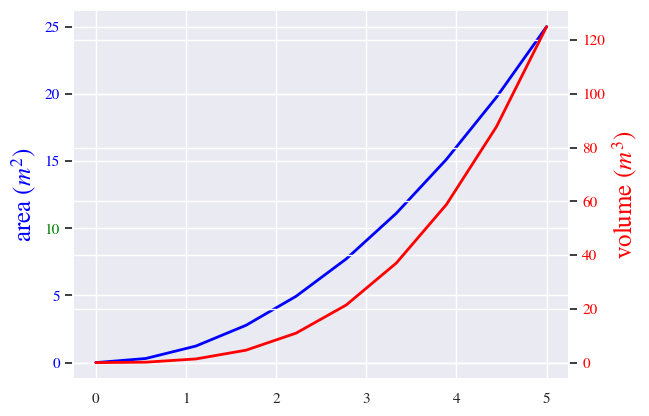

In [22]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
ax1.get_yticklabels()[3].set_color("green")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

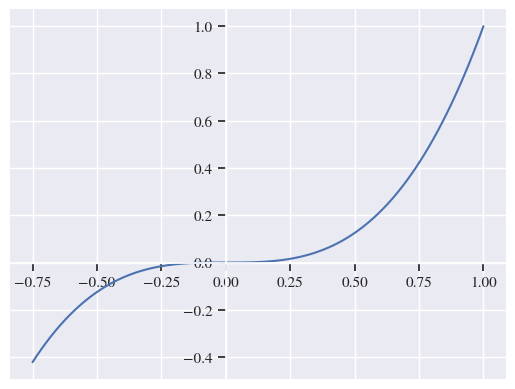

In [23]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

# Other 2D plot styles

In [27]:
xx = np.linspace(-0.75, 1., 100)
n = np.array([0,1,2,3,4,5])
random_points = np.random.randn(100000)

There are a number of functions for generating different kind of plots. To see the complete list, check here: <br>
http://matplotlib.org/gallery.html

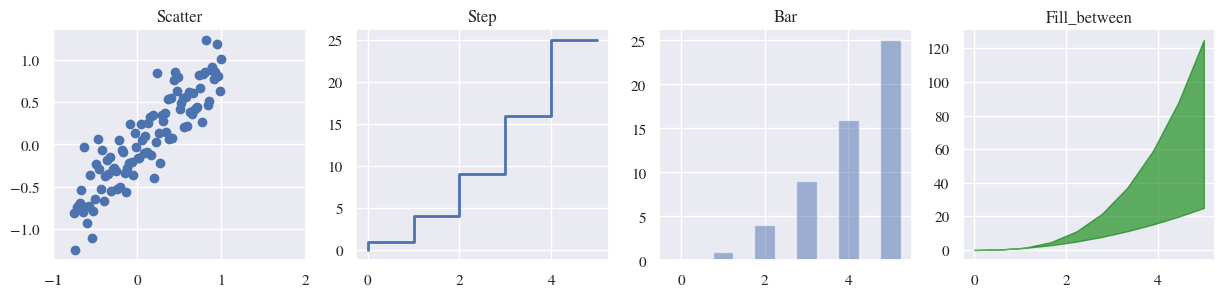

In [25]:
fig, axes = plt.subplots(1, 4, figsize=(15,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("Scatter")
axes[0].set_xticks([-1, -1, 0, 1, 2])

axes[1].step(n, n**2, lw=2)
axes[1].set_title("Step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("Bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.6);
axes[3].set_title("Fill_between");

Matplotlib is also capable to use polar planes.

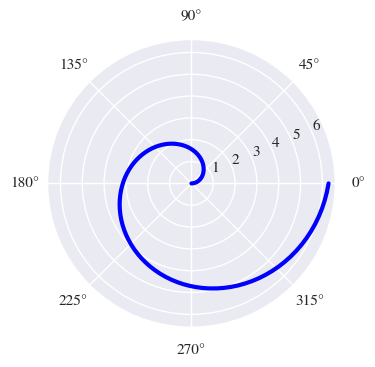

In [26]:
fig = plt.figure()
ax = fig.add_axes([0,0,.6,.6], polar = True)
t = np.linspace(0, 2*np.pi, 100)
ax.plot(t, t, color='blue', lw=3)

Histograms are also important graphs available in matplotlib.

(-4.2871663936585644, 4.4588202540065085)

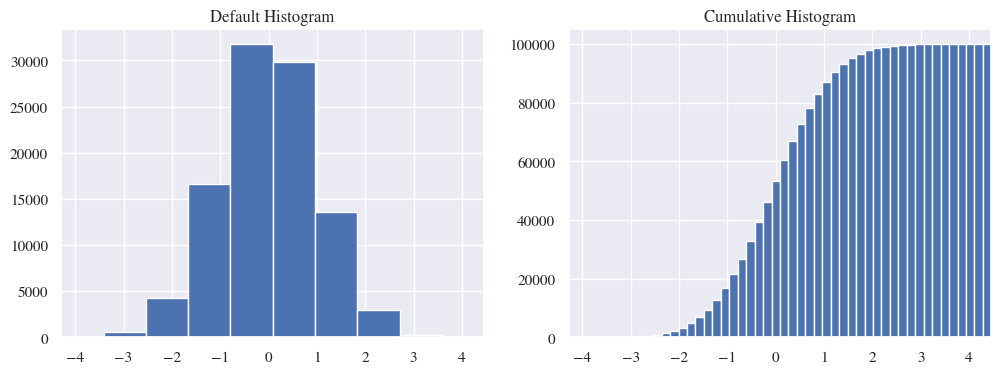

In [30]:
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

axes[0].hist(random_points)
axes[0].set_title("Default Histogram")
axes[0].set_xlim( (min(random_points), max(random_points)) )

axes[1].hist(random_points, cumulative = True, bins = 50)
axes[1].set_title("Cumulative Histogram")
axes[1].set_xlim( (min(random_points), max(random_points)) )

If we want to plot functions of two variables, we can make use of colormaps and contours. The color encodes one dimension of the data. <br>
To do this, we need a function assigning a value to each coordinate: $f:\mathbb{R}^{2} \mapsto \mathbb{R}$ . <br>
A list of pre-defined colormaps is available here:
http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [44]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [51]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m) #Meshgrid creates a rectangular grid out of the two given one-dimensional arrays. 
Z = flux_qubit_potential(X, Y).T

array([[0.        , 0.06346652, 0.12693304, ..., 6.15625227, 6.21971879,
        6.28318531],
       [0.        , 0.06346652, 0.12693304, ..., 6.15625227, 6.21971879,
        6.28318531],
       [0.        , 0.06346652, 0.12693304, ..., 6.15625227, 6.21971879,
        6.28318531],
       ...,
       [0.        , 0.06346652, 0.12693304, ..., 6.15625227, 6.21971879,
        6.28318531],
       [0.        , 0.06346652, 0.12693304, ..., 6.15625227, 6.21971879,
        6.28318531],
       [0.        , 0.06346652, 0.12693304, ..., 6.15625227, 6.21971879,
        6.28318531]])

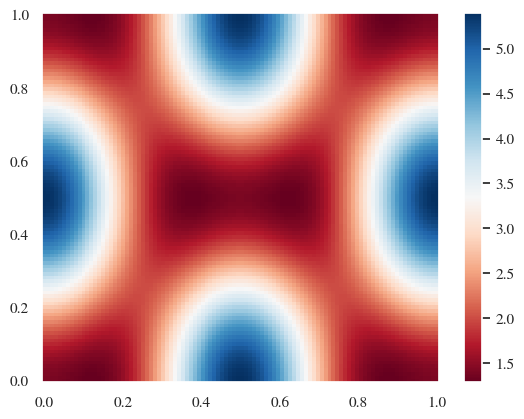

In [52]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

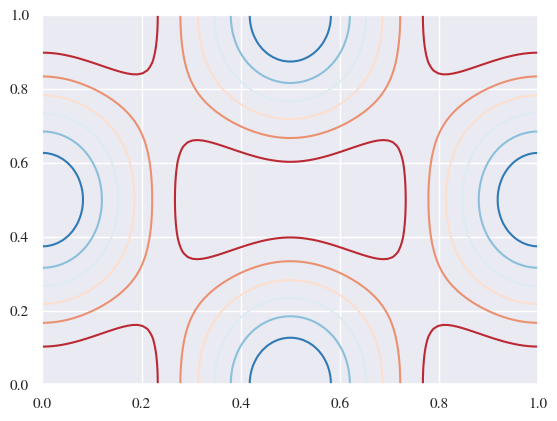

In [53]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])